##NLTK's VADER module:

VADER is an NLTK module that provides sentiment scores based on used words (e.g. "completely" boosts a score, while "slightly" reduces it), capitalization & punctuation (e.g. "GREAT!!!" is stronger than "great."), and negations (e.g. words like "isn't" and "doesn't" affect the outcome).
To view the source code visit https://www.nltk.org/_modules/nltk/sentiment/vader.html

In [3]:
#**Download the VADER lexicon.** You only need to do this once.
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

VADER's SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:

*   negative
*   neutral
*   positive
*   compound (computed by normalizing the scores above)

In [4]:
# Import SentimentIntensityAnalyzer and create an sid object
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [108]:
def classify_scores(string):
     scores = sid.polarity_scores(string)
     if scores['compound'] == 0: return 'Neutral'
     elif scores['compound'] > 0: return 'Positive'
     else: return 'Negative'
classify_scores("I disagree!!!")
#output: 'Negative'

'Negative'

<---------------------------------------------------------------------------------------------------------------------->
Review 
"AI with human like emotions ;) sounds unrealistic but I enjoyed the plot! I would recommend this to everyone to watch! Have fun guys!!!" 
 	 and sentiment scores {'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.9478}

Review Rating :  Positive


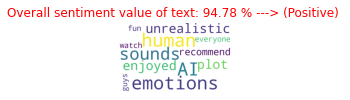

<---------------------------------------------------------------------------------------------------------------------->
Review 
"Terrible night mare! Do not deal with them not only they failed to deliver on time twice, they lie and treat you with disrespect. I had to take 2 days off and had to deal with rude deliver guys who refused to do their job. The sales people are worse who lies and treat you with disrespect. They should be called “BAD Guys!!”" 
 	 and sentiment scores {'neg': 0.259, 'neu': 0.639, 'pos': 0.102, 'compound': -0.9113}

Review Rating :  Negative


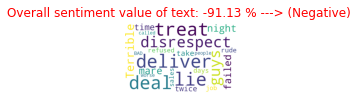

<---------------------------------------------------------------------------------------------------------------------->
Review 
"Best movie for those who search for real love which will be always unexpected" 
 	 and sentiment scores {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.8555}

Review Rating :  Positive


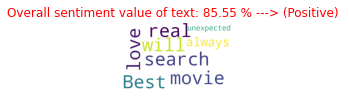

<---------------------------------------------------------------------------------------------------------------------->
Review 
"Alexis Bledel is an amazing actress!" 
 	 and sentiment scores {'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'compound': 0.6239}

Review Rating :  Positive


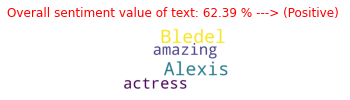

In [114]:
#create a function for wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def create_wordcloud(text):    
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(text)
    plt.figure(figsize=(2,2))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.title("Overall sentiment value of text: "+str(round(100*sid.polarity_scores(text)['compound'],2))+" % ---> ("+str(classify_scores(text))+") ",color="RED")
    plt.show()
    
# Write a review as one continuous string (multiple sentences are ok)
reviews = ['AI with human like emotions ;) sounds unrealistic but I enjoyed the plot! I would recommend this to everyone to watch! Have fun guys!!!',
           'Terrible night mare! Do not deal with them not only they failed to deliver on time twice, they lie and treat you with disrespect. I had to take 2 days off and had to deal with rude deliver guys who refused to do their job. The sales people are worse who lies and treat you with disrespect. They should be called “BAD Guys!!”',
           'Best movie for those who search for real love which will be always unexpected',
           'Alexis Bledel is an amazing actress!'
]

#We can **write** a function that takes in a review and returns a score of "Positive", "Negative" or "Neutral"
def classify_scores(string):
    scores = sid.polarity_scores(string)
    if scores['compound'] == 0:
        return 'Neutral'
    elif scores['compound'] > 0:
        return 'Positive'
    else:
        return 'Negative'

# Obtain the sentiment scores for given reviews, classify into "Positive", "Negative" and "Neutral" and plot the wordcloud.
for review in reviews:
    score = sid.polarity_scores(review)
    print("<---------------------------------------------------------------------------------------------------------------------->")
    print(f'Review \n"{review}" \n \t and sentiment scores {score}\n')
    print("Review Rating : ",classify_scores(review))
    create_wordcloud(review)


